#           INTERNET SERVICE CHURN 

## Objective
Analyze customer behavior and characteristics to identify key factors that contribute to churn (service discontinuation). Utilize these insights to develop targeted interventions aimed at retaining customers who exhibit a high propensity to churn.

## Context of Analysis
           
Maintaining a loyal customer base is crucial for long-term success. While acquiring new subscribers is important, retaining existing ones is even more vital for revenue growth and profitability.

### Understanding Churn

Churn, also known as customer attrition, refers to the rate at which customers discontinue their services with a provider. In the telecom sector, churn can have a significant impact on revenue and overall business performance. This is why telecom companies invest in churn analysis to identify patterns and predictors of customer churn. By understanding why customers leave, companies can develop strategies to proactively address issues and retain valuable customers.

### Reasons for Churn

Although factors such as price and product features play a role, customer satisfaction and the quality of customer service often emerge as the most influential factors in churn decisions. Customers who feel valued and supported are less likely to switch to a competitor.

### Reducing Churn

To reduce churn, companies employ various strategies, including:

* Improving customer service: Providing prompt and effective support, addressing customer complaints, and proactively resolving issues.
* Enhancing product offerings: Offering innovative features and services that meet customer needs and expectations.
Competitive pricing: Ensuring pricing structures are competitive within the market.
* Building customer loyalty: Establishing strong relationships with customers through personalized communication, loyalty programs, and exclusive offers.
* Effective communication: Keeping customers informed about new products, services, and promotions, while also addressing potential concerns.

### The Importance of Churn Analysis

Churn analysis empowers telecom companies to take data-driven actions to minimize customer attrition. By analyzing customer data, companies can identify at-risk customers and implement targeted retention strategies. This might involve personalized offers, improved customer support, or addressing specific pain points. Ultimately, reducing churn translates to increased customer lifetime value, improved revenue, and a stronger competitive position in the market.

By investing in churn reduction initiatives and leveraging the insights gained from churn analysis, telecom companies can create a more loyal and satisfied customer base, leading to long-term growth and success in the dynamic telecommunications landscape.

## Recommendations for Churn Mitigation Derived from the Data Analysis:
### these are the conclusions. Comments, notes, or observations follow mant of the 74 steps below.

1. <b>Proactive Contract Management</b>: As contract expiration is a strong predictor of churn, implement proactive strategies before contracts end. Offer renewal incentives tailored to each customer's initial sign-up reasons (e.g., promotional discounts, service upgrades) to encourage continued subscription.

2. <b>Targeted Pricing Adjustments</b>: Recognizing the impact of service cost on churn, consider offering reduced rates or flexible pricing options to customers approaching contract expiration or demonstrating churn-like behavior. Conduct a cost-benefit analysis to ensure any discounts offered result in greater profitability compared to acquiring new customers.

3. <b>Data Usage Policy Review</b>: Investigate the relationship between data overage charges and churn, particularly for customers with TV subscriptions. Evaluate the feasibility of adjusting data limits or offering separate data plans for customers with TV services to alleviate potential financial burdens.

4. <b>Bundled Service Optimization</b>: Analyze the churn rates for customers with combined TV and movie subscriptions. Assess the profitability of these bundles and consider offering alternative options (e.g., standalone TV subscriptions) or targeted promotions to mitigate churn within this segment.

5. <b>Service Reliability Improvement</b>:  Prioritize addressing service failures, as they contribute to customer dissatisfaction and churn. Implement proactive measures to reduce disruptions and offer compensation or incentives (e.g., service credits, free upgrades) to affected customers to mitigate the impact of service outages.

Additional Considerations:

1. <b>Customer Segmentation</b>:  Develop a more nuanced understanding of customer segments based on demographics, usage patterns, and other relevant factors. This will enable the implementation of highly targeted retention strategies.

2. <b>Customer Feedback</b>:  Gather feedback from both current and churned customers to understand their pain points, preferences, and reasons for leaving. This valuable information can guide the development of targeted improvements.

3. <b>Ongoing Monitoring and Analysis</b>: Continuously monitor churn rates and assess the effectiveness of implemented strategies. Adjust retention efforts based on evolving customer behavior and market trends.

By implementing these recommendations and continuously refining your approach, you can significantly reduce churn, enhance customer satisfaction, and drive sustainable growth in the telecommunications market.

##  Data Dictionary

The dataset consist of the following features:
1) is_tv_subscriber
* 0 = no subscription
* 1 = subscription

2) is_movie_package_subscriber
* 0 = no subscription
* 1 = subscription

3) subscription_age - how many years has the customer use our service
* years in decimal

4) bill_avg
* last 3 months, in USD

5) remaining_contract - how many years or fraction of years remainingt
* a value of zero indicates the contract has expired
* a value > zero is number of decimal years until contract expiration
* a value of NULL (or NaN) indicates the customer did not have a contract

6) service_failure_count
* the number of calls to customer service related to a service failure for last 3 months

7) download_avg
* last 3 months data download usage, in GB

8) upload_avg last
* last 3 months of data uploaded, in GB

9) download_over_limit
* number of times a customer exceeded the download limit in the last nine months

10) churn
* 0 = current customer
* 1 = cancelled service aka churn

dataset cource: https://www.kaggle.com/mehmetsabrikunt/internet-service-churn/metadata   
my analysis, methods, and recommendations differ from the author of the dataset.

## Import python libraries

In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

##  Import Dataset

In [2]:
df = pd.read_csv("data/internet_service_churn.csv", engine="python", encoding="utf-8 ")

## Data Characterization

### generate descriptive statistics

In [3]:
df.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,7.227400e+04,72274.000000,72274.000000,72274.000000,72274.000000,50702.000000,72274.000000,71893.000000,71893.000000,72274.000000,72274.000000
mean,8.463182e+05,0.815259,0.334629,2.450051,18.942483,0.716039,0.274234,43.689911,4.192076,0.207613,0.554141
std,4.891022e+05,0.388090,0.471864,2.034990,13.215386,0.697102,0.816621,63.405963,9.818896,0.997123,0.497064
min,1.500000e+01,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222165e+05,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,8.477840e+05,1.000000,0.000000,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.269562e+06,1.000000,1.000000,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


### display column types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   remaining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


### display the first five rows of data

In [5]:
df.head(5)

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


## Clean data

### is there NULL data?

In [6]:
df.isna().sum()

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
remaining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

#### remaining_contract is the number of months left in the contract period.
1) replace NULL values with 0
2) create an explicit new column, has_contract, instead of infering a status from the number of months remaining.

In [7]:
# Replace nulls with 0
df.fillna(0, inplace=True)

# insert a new column in the middle of the table
column_names = df.columns.tolist()
column_names.insert(5, 'has_contract')
print(f'column_names: {column_names}')

# create a new column of type int then copy and convert data to 0 or 1 if current value > 0
df['has_contract'] = pd.Series(dtype='Int64')
df['has_contract'] = df['remaining_contract'].apply(lambda x: 1 if x > 0 else 0)

# rearrange (reindex) columns
df = df.reindex(columns=column_names)

column_names: ['id', 'is_tv_subscriber', 'is_movie_package_subscriber', 'subscription_age', 'bill_avg', 'has_contract', 'remaining_contract', 'service_failure_count', 'download_avg', 'upload_avg', 'download_over_limit', 'churn']


#### display data to confirm the has_contract populated correctly

In [8]:
df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,has_contract,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,1,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,0,0.00,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,0,0.00,1,0.0,0.0,0,1
4,34,0,0,6.39,0,0,0.00,0,0.0,0.0,0,1


In [9]:
df.tail()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,has_contract,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
72269,1689648,1,1,0.09,0,1,1.25,0,0.0,0.0,0,1
72270,1689676,1,0,0.06,1,1,1.63,0,0.8,0.0,0,1
72271,1689679,1,0,0.02,0,1,2.19,0,1.5,0.2,0,1
72272,1689733,0,0,0.01,0,1,0.72,0,0.0,0.0,0,1
72273,1689744,1,1,0.01,0,1,0.82,0,0.0,0.0,0,1


In [10]:
df.isna().sum()

id                             0
is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
has_contract                   0
remaining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64

#### simple data cleanup completed
Data is ready for analysis

## Exploratory Data Analysis

### Churn Rate

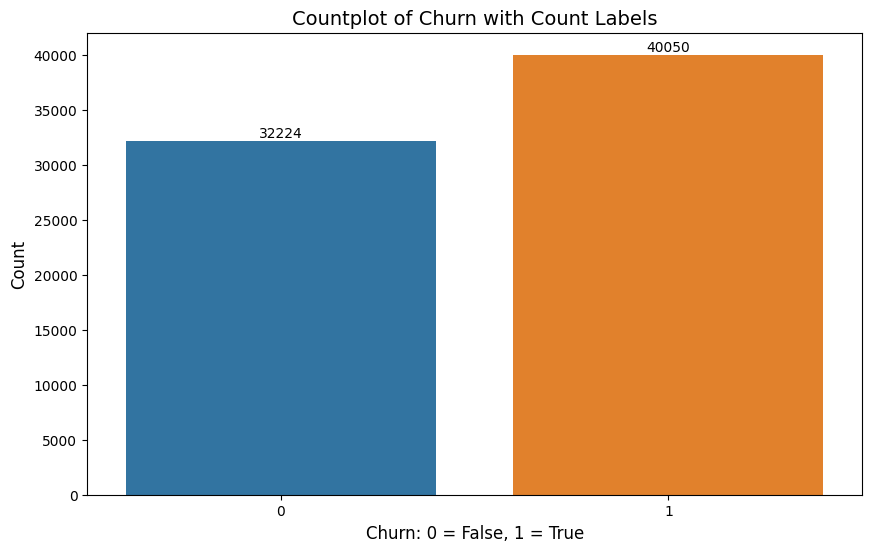

In [11]:
# Create the countplot
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
ax = sns.countplot(x='churn', data=df, hue='churn', dodge=False, legend=False)

# Add count labels on top of the bars
for container in ax.containers:
    ax.bar_label(container)

plt.title('Countplot of Churn with Count Labels', fontsize=14)
plt.xlabel('Churn: 0 = False, 1 = True', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

#### another way to get the churn value_counts()

In [12]:
df['churn'].value_counts()

churn
1    40050
0    32224
Name: count, dtype: int64

#### what is the relationship between churn to tv or movie subscriptions?

In [13]:
df[["is_tv_subscriber","is_movie_package_subscriber"]].sum()

is_tv_subscriber               58922
is_movie_package_subscriber    24185
dtype: int64

In [14]:
df.groupby('is_tv_subscriber')['is_movie_package_subscriber'].value_counts()

is_tv_subscriber  is_movie_package_subscriber
0                 0                              13350
                  1                                  2
1                 0                              34739
                  1                              24183
Name: count, dtype: int64

#### what does this mean?
* there are 13,350 customers who are not tv or movie subscribers
* only two customers subscribed to the movie package who did not subscribe to the tv package!
    + QUESTION: how much infrastructure do we have in place to support the only two customers who selected movies and not tv?
* 34,739 customers selected a tv subscription without a movie package
* 24,183 customers selected both the tv asnd movie subscriptions

In [15]:
df.groupby('is_tv_subscriber')['churn'].value_counts()

is_tv_subscriber  churn
0                 1        11966
                  0         1386
1                 0        30838
                  1        28084
Name: count, dtype: int64

#### what does this mean?
* 11,966 customers who are not tv subscribers churned (aka left)
* 1,386 customers who are not tv subscribers stayed
* 30,838 customers who selected a tv subscription did NOT churn
* 28,084 customers who selected a tv subscription churned

#### instead of counts, display as percentages

In [16]:
df.groupby('is_tv_subscriber')['churn'].value_counts(normalize=True) * 100

is_tv_subscriber  churn
0                 1        89.619533
                  0        10.380467
1                 0        52.336988
                  1        47.663012
Name: proportion, dtype: float64

In [17]:
#### create a dataframe only containing churned customers

In [18]:
# create a dataframe of churned and not_churned customers
df_churned = df[df['churn'] == 1] 
df_churned.head()
df_not_churned = df[df['churn'] == 0] 
df_not_churned.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,has_contract,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,1,0.14,0,8.4,2.3,0,0
5,56,1,1,11.94,32,1,1.38,0,69.4,4.0,0,0
11,174,1,1,11.93,10,1,1.28,0,10.6,0.6,0,0
15,288,1,1,11.93,18,1,1.80,0,1.0,0.0,0,0
16,291,1,0,11.93,22,1,0.01,1,10.6,2.4,0,0


## What is the relationship between tv subscriptions and churn?

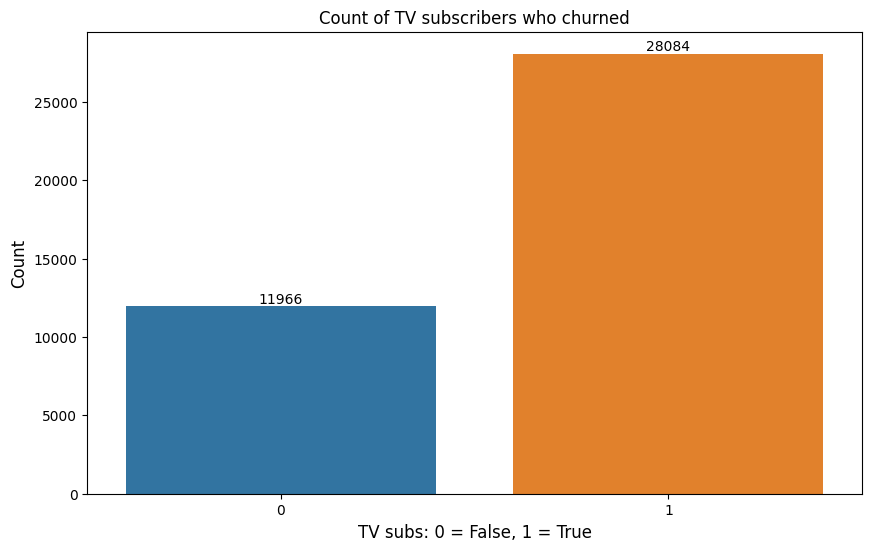

In [19]:
# Create the countplot
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
ax = sns.countplot(x = 'is_tv_subscriber', data = df_churned, hue='is_tv_subscriber', dodge=False, legend=False)

# Add count labels on top of the bars
for container in ax.containers:
    ax.bar_label(container)

plt.title("Count of TV subscribers who churned")
plt.xlabel('TV subs: 0 = False, 1 = True', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

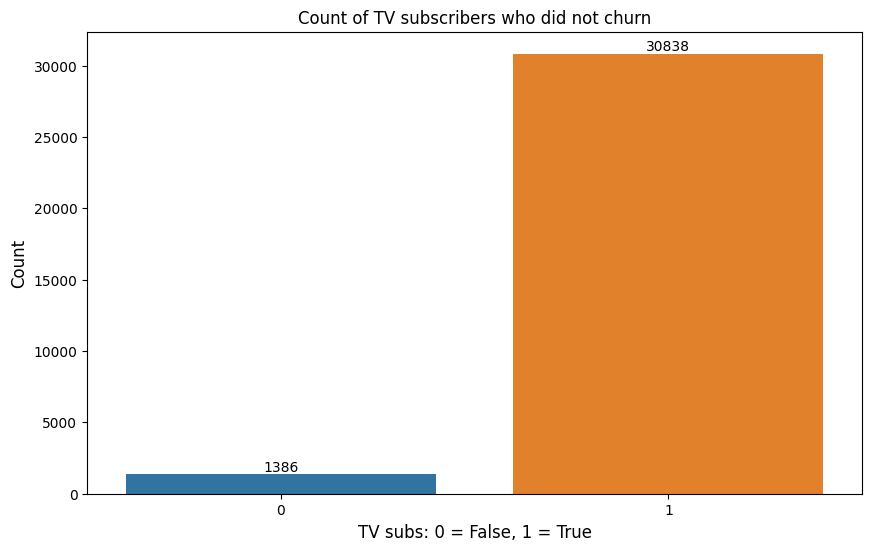

In [20]:
# Create the countplot
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
ax = sns.countplot(x = 'is_tv_subscriber', data = df_not_churned, hue='is_tv_subscriber', dodge=False, legend=False)

# Add count labels on top of the bars
for container in ax.containers:
    ax.bar_label(container)

plt.title("Count of TV subscribers who did not churn")
plt.xlabel('TV subs: 0 = False, 1 = True', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

#### Comparing tv subscriptions between customers who do and do not churn
#### SUMMARY: NOT subscribing for a TV subscription is more likely to churn than those who did not churn.

##### example python code to generate a reduced ratio
    import math  
    numerator = 11966
    denominator = 28084
    gcd = math.gcd(numerator, denominator)

    reduced_numerator = numerator // gcd
    reduced_denominator = denominator // gcd

    print(f"Reduced ratio: {reduced_numerator}:{reduced_denominator}")  

    percentage = (numerator / denominator) * 100
    formatted_percentage = "{:.2f}%".format(percentage)  # Format to 2 decimal places

    print(f"Percentage: {formatted_percentage}")

##### initial analysis of tv subs who did and did not churn
* tv subs who churned:
    * Ratio: 11966/28084
    * Reduced ratio: 5983:14042
    * Percentage: 42.61%

* tv subs who did not churn:
    * Ratio: 1386/30838
    * Reduced ratio: 693:15419
    * Percentage: 4.49%

##### an initial hypothesis is customers who subscribe are more likely to not churn
##### however, a tv subscription is not a great indicator of churning or not churning

## What is the relationship between movie subscriptions and churn?

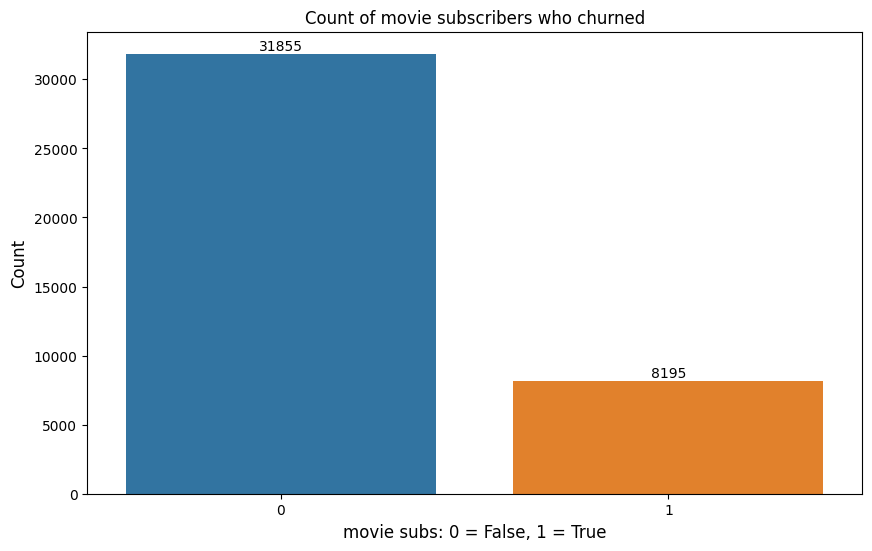

In [21]:
# Create the countplot
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
ax = sns.countplot(x = 'is_movie_package_subscriber', data = df_churned, hue='is_movie_package_subscriber', dodge=False, legend=False)

# Add count labels on top of the bars
for container in ax.containers:
    ax.bar_label(container)

plt.title("Count of movie subscribers who churned")
plt.xlabel('movie subs: 0 = False, 1 = True', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

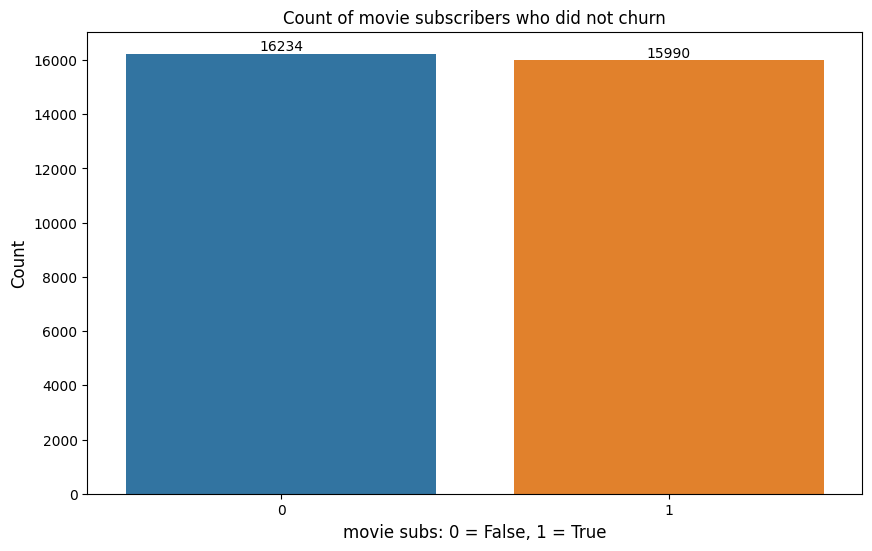

In [22]:
# Create the countplot
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
ax = sns.countplot(x = 'is_movie_package_subscriber', data = df_not_churned, hue='is_movie_package_subscriber', dodge=False, legend=False)

# Add count labels on top of the bars
for container in ax.containers:
    ax.bar_label(container)

plt.title("Count of movie subscribers who did not churn")
plt.xlabel('movie subs: 0 = False, 1 = True', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

#### Comparing movie subscriptions between customers who do and do not churn
#### SUMMARY: subscribing for a movie subscription is a strong indication of churn.

##### example python code to generate a reduced ratio
import math
numerator = 11966
denominator = 28084
gcd = math.gcd(numerator, denominator)

reduced_numerator = numerator // gcd
reduced_denominator = denominator // gcd

print(f"Reduced ratio: {reduced_numerator}:{reduced_denominator}")  

percentage = (numerator / denominator) * 100
formatted_percentage = "{:.2f}%".format(percentage)  # Format to 2 decimal places

print(f"Percentage: {formatted_percentage}")
'''

##### initial analysis of tv subs who did and did not churn
* movie subs who churned:
    * Ratio: 31855/8195
    * Reduced ratio: 6371:1639
    * Percentage: 388.71%

* movie subs who did not churn:
    * Ratio: 16234/15999
    * Reduced ratio: 16234:15999
    * Percentage: 101.47%

##### an initial hypothesis is customers who did not subscribe for movies are more likely to churn
##### however, there is a minimal difference between movie subscriptions and subscribers who did not churn

### updated hypothesis
#### facts learned so far
Customers who churn are more likely to NOT subscribe for the TV service.
Also, customers who subscribe to the movie service are more likely to churn.
#### new hypothesis
There seems to be a relationship between customers who subscribe for the TV service and DO NOT subscribe for the movie service are NOT churning.
COMMENT: maybe there is value in the tv subscription that is offset by customers who subscribe for both tv and movies. In other words, movie + tv subscribers churn more often than those who only subscribe for the tv service.

## Do customers churn less with higher subscription years?

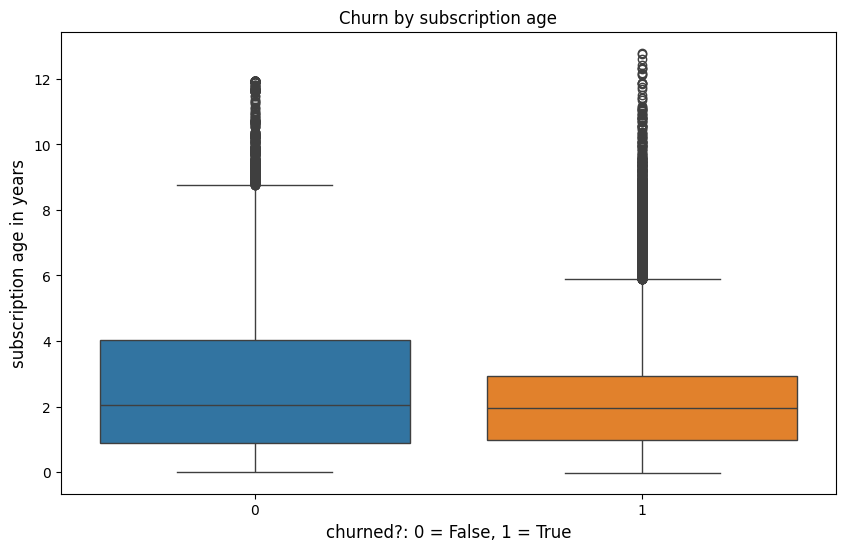

In [23]:
# Create the box plot
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
ax = sns.boxplot(x='churn', y='subscription_age', data=df, hue='churn', dodge=False, legend=False)

plt.title("Churn by subscription age")
plt.xlabel('churned?: 0 = False, 1 = True', fontsize=12)
plt.ylabel('subscription age in years', fontsize=12)

plt.show()

In [24]:
# print the description statics of subscription age by churn
description = df_churned['subscription_age'].describe()
print('Churn stats')
print(description)
description = df_not_churned['subscription_age'].describe()
print('Not churned stats')
print(description)

Churn stats
count    40050.000000
mean         2.226554
std          1.709438
min         -0.020000
25%          0.980000
50%          1.970000
75%          2.940000
max         12.800000
Name: subscription_age, dtype: float64
Not churned stats
count    32224.000000
mean         2.727828
std          2.348857
min          0.000000
25%          0.880000
50%          2.050000
75%          4.030000
max         11.950000
Name: subscription_age, dtype: float64


### most customers who churn do so between 1 year (0.98) and 3 years (2.94) while those who do not churn have a range of 11 months to four years. 
There is a relationship between not churning and how long the customer has subscribed.   
The relationship is likely stronger than this data indicates because it also contains customers who have not yet churned but may churn in the future. i.e., a customer is currently subscribed for 11 months may churn in 13 months from now (a total of two years).   
It isn't available in the data, but the incentive of signing up for a two year contract and getting a new phone may be the strongest indicator of churn vs. not churn. The length of the contract and the penalities for leaving early may also be streatching a custoimer to remain two years when they have already made the decision to leave much earlier.

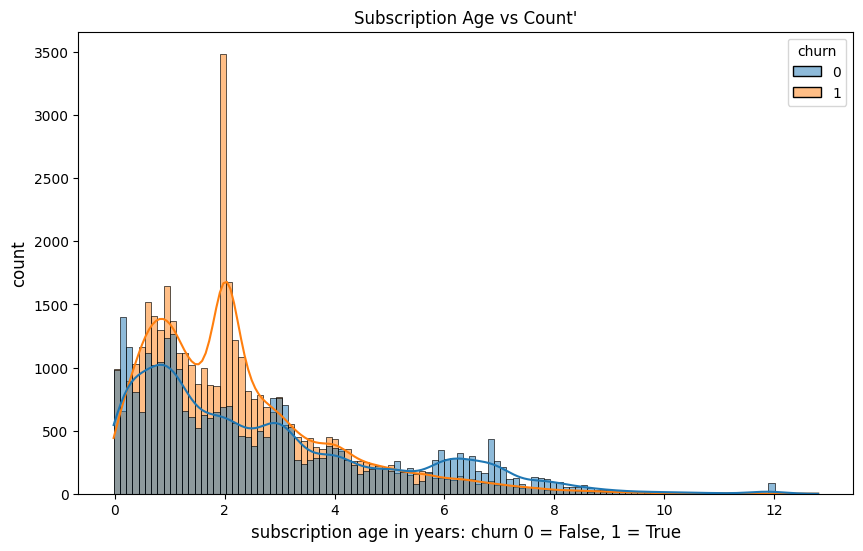

In [25]:
# Create a histogram
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
ax = sns.histplot(x='subscription_age', data=df, hue='churn', kde=True, legend=True)

plt.title("Subscription Age vs Count'")
plt.xlabel('subscription age in years: churn 0 = False, 1 = True', fontsize=12)
plt.ylabel('count', fontsize=12)

plt.show()

#### Based on this plot, the greatest predictor of churn is the expiration of the two year contract.

## Is the customers bill average caused effect on churn rate? 

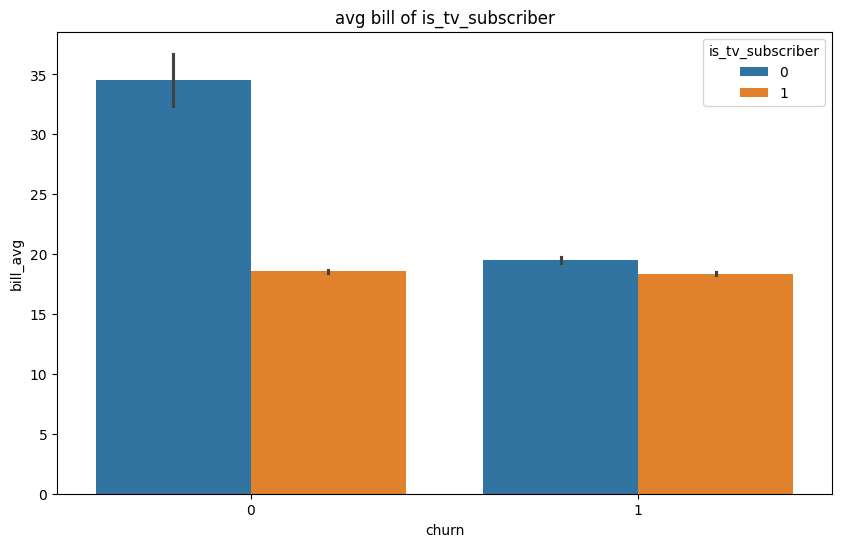

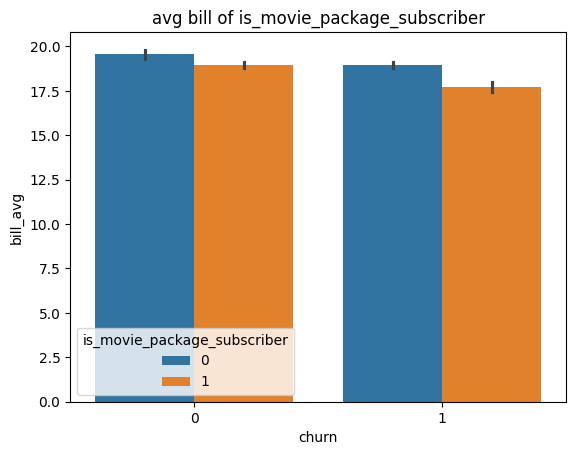

In [26]:
# Create the countplot
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size

subscribers=["is_tv_subscriber","is_movie_package_subscriber"]
for i in subscribers:
    sns.barplot(x="churn", y="bill_avg", data=df, hue=i)
    plt.title("avg bill of "+ i)
    plt.show()

#### customers with higher bill averages for the past three months are less likely to churn than those who have lower fills.
#### COMMENT: there may be a problem with the data because it appeares customers with subscripts pay less, on average, then customers without subscriptions.

In [27]:
df.groupby(['is_tv_subscriber', 'is_movie_package_subscriber'])[['bill_avg','churn']].agg(['sum'])

bill_avg  churn
                                                  sum    sum
is_tv_subscriber is_movie_package_subscriber                
0                0                             281154  11964
                 1                                 28      2
1                0                             639927  19891
                 1                             447940   8193

###### The customers who didn't have any subscription has lower average bill but still had a good amount of churn.
###### The cusomers who only has tv subscription has higher average bill with highest churn rate.
###### Customers with both subscription has the lowest churn rate.


###### Thus, Bill average overall can be considered a factor which can cause the customer to churn

## Is remaining contract effects churn rate?

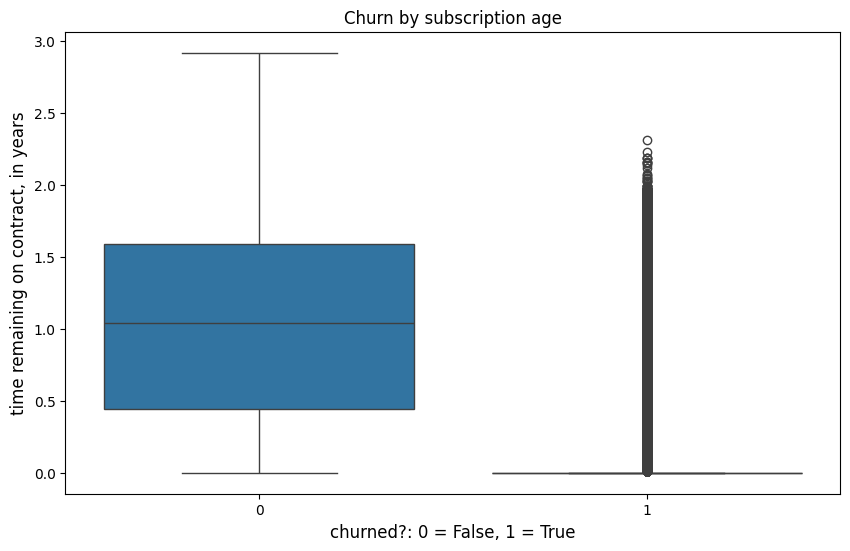

In [28]:
# Create the box plot
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
ax = sns.boxplot(x='churn', y='remaining_contract', data=df, hue='churn', dodge=False, legend=False)

plt.title("Churn by subscription age")
plt.xlabel('churned?: 0 = False, 1 = True', fontsize=12)
plt.ylabel('time remaining on contract, in years', fontsize=12)

plt.show()

#### Customers who have time left on their contracts are an excellent indicator of not churning.

## Does contract selection cause churn? 

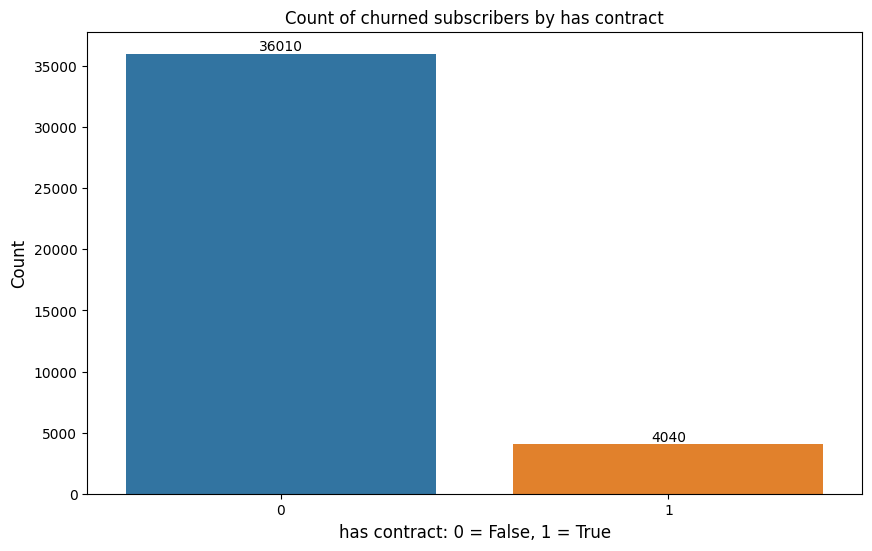

In [29]:
# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
ax = sns.countplot(x='has_contract', data=df_churned, hue='has_contract', dodge=False, legend=False)

# Add count labels on top of the bars
for container in ax.containers:
    ax.bar_label(container)

plt.title("Count of churned subscribers by has contract")
plt.xlabel('has contract: 0 = False, 1 = True', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

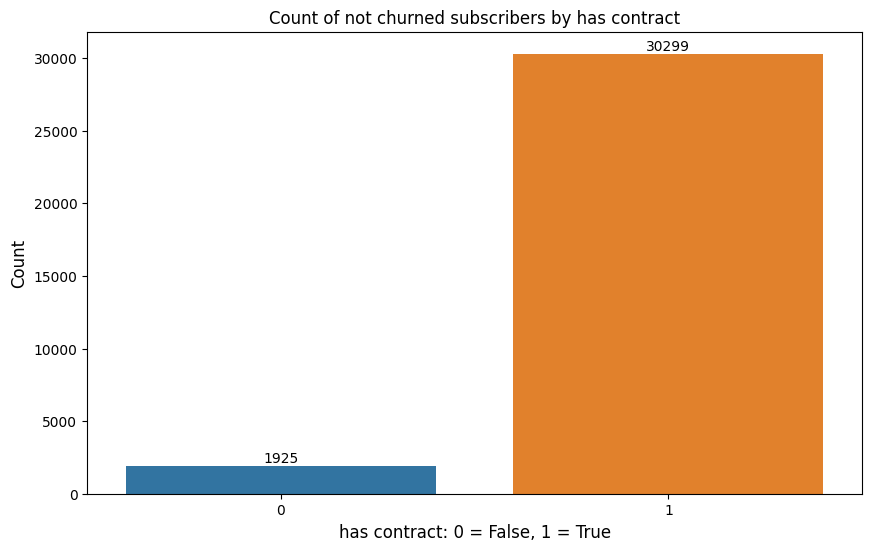

In [30]:
# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
ax = sns.countplot(x='has_contract', data=df_not_churned, hue='has_contract', dodge=False, legend=False)

# Add count labels on top of the bars
for container in ax.containers:
    ax.bar_label(container)

plt.title("Count of not churned subscribers by has contract")
plt.xlabel('has contract: 0 = False, 1 = True', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

###### Customers opted for contract are more compared to non - contract. Churn is higher for people who do have contract's. This can be related to customers whose contracts are about to end or ended opting to churn.

## Do customers having service failure causing churn?

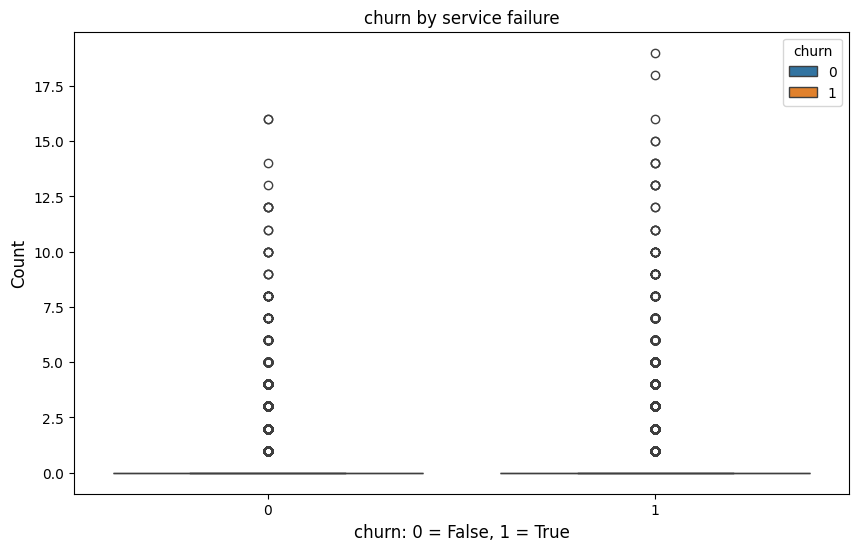

In [31]:
# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size

ax = sns.boxplot(x="churn", y="service_failure_count", data=df, hue='churn', dodge=False, legend=True)
plt.title('churn by service failure')
plt.xlabel('churn: 0 = False, 1 = True', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

#### Customers with higher service failure calls churn. 
#### COMMENT: Service failure by has_contract my reveal that customers would like to leave, but can't because of the contract penalities.

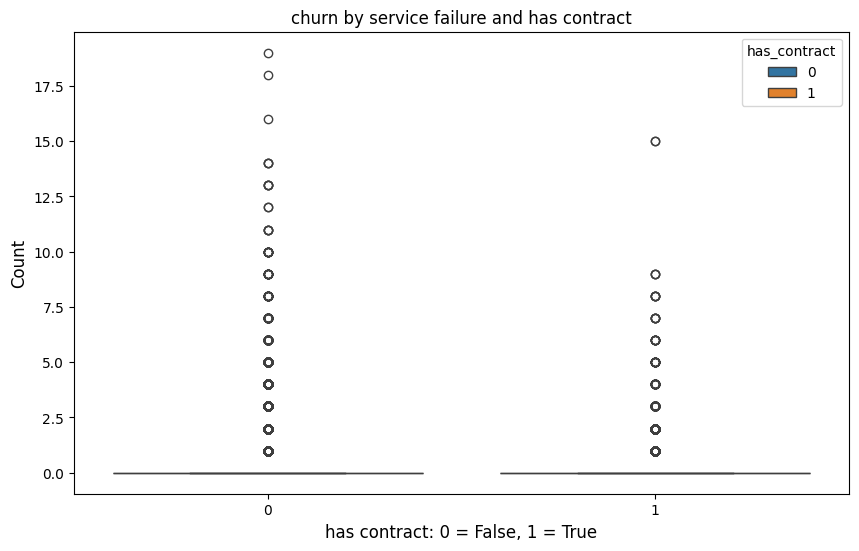

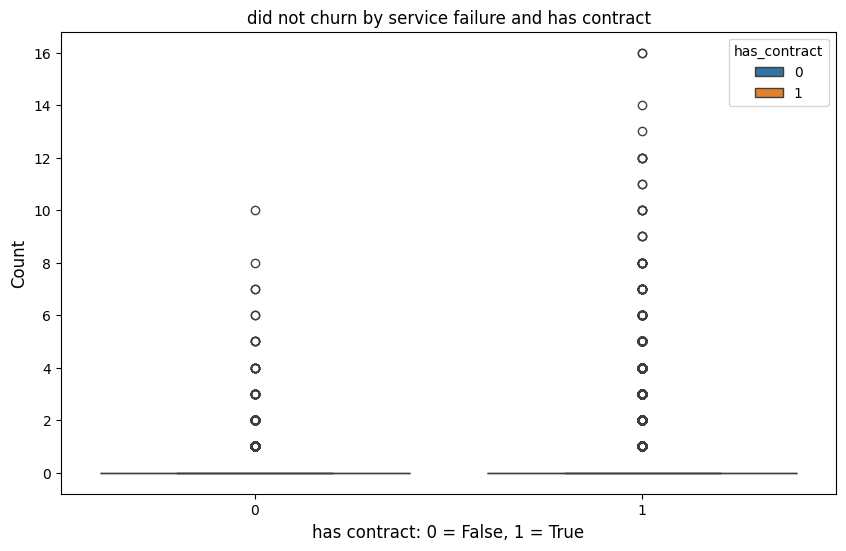

In [32]:
# Create the plot
dataframes = [df_churned, df_not_churned]
dataframe_title = ["churn by service failure and has contract","did not churn by service failure and has contract"]
for index, dataframe in enumerate(dataframes):
    plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
    ax = sns.boxplot(x="has_contract", y="service_failure_count", data=dataframe, hue='has_contract', dodge=False, legend=True)
    plt.title(dataframe_title[index])
    plt.xlabel('has contract: 0 = False, 1 = True', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.show()

#### Customers who do not have a contract and experience service failures are more likely to churn
There appears to be a positive relationship between service failure and contract status that was hidden in the previous plot

## Is download average of customers causing churn?

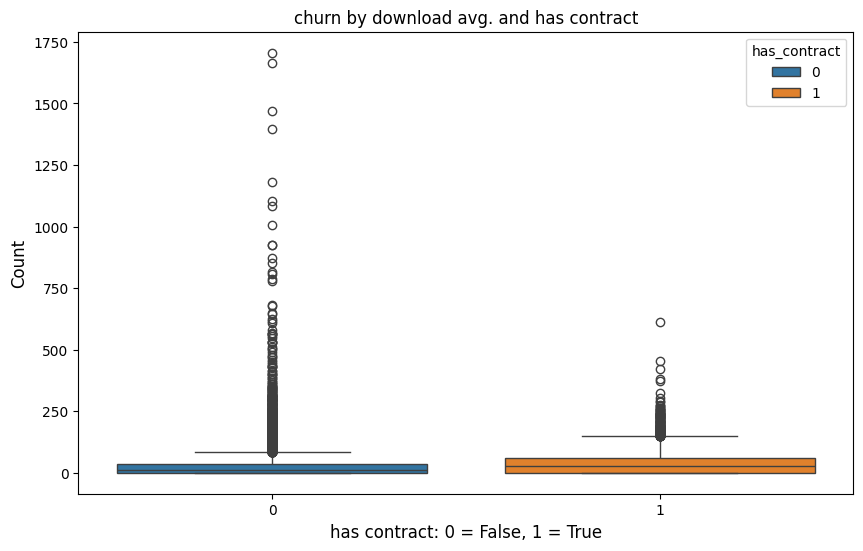

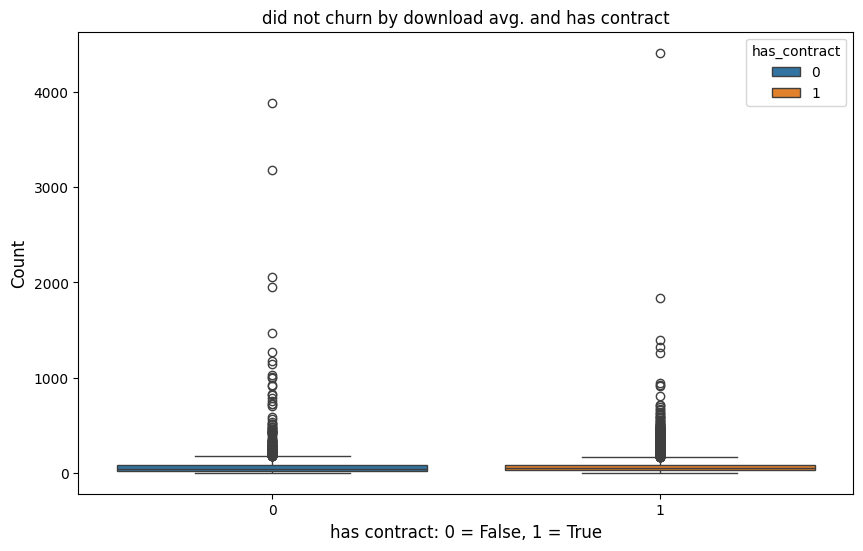

In [33]:
# Create the plot
dataframes = [df_churned, df_not_churned]
dataframe_title = ["churn by download avg. and has contract","did not churn by download avg. and has contract"]
for index, dataframe in enumerate(dataframes):
    plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
    ax = sns.boxplot(x="has_contract", y="download_avg", data=dataframe, hue='has_contract', dodge=False, legend=True)
    plt.title(dataframe_title[index])
    plt.xlabel('has contract: 0 = False, 1 = True', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.show()

#### High dopwnload averages and does not have a contract have appears to have a positive relationship with churn.
#### However, evaluate the charts below that use the same y-axis range

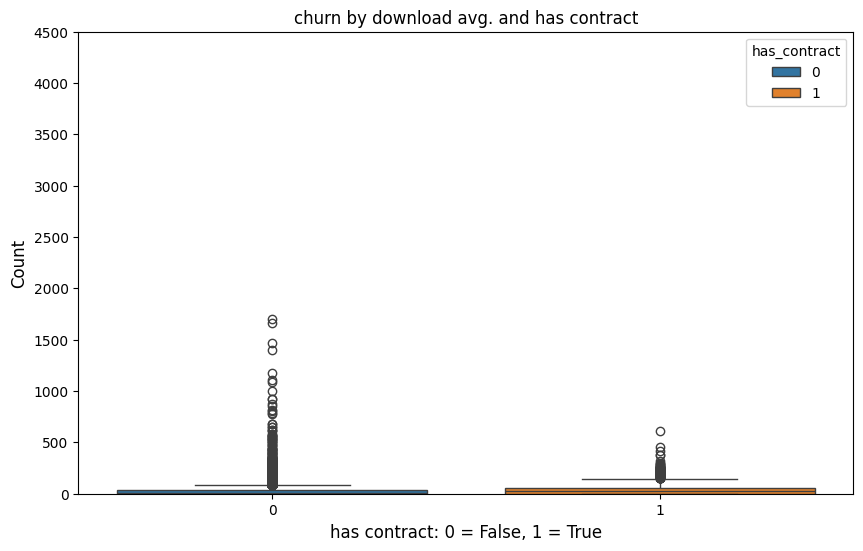

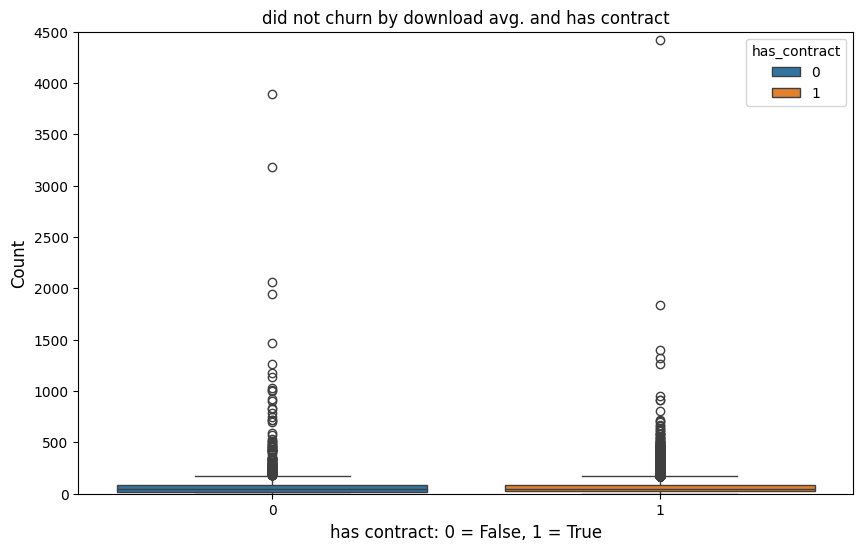

In [34]:
# Create the plot
dataframes = [df_churned, df_not_churned]
dataframe_title = ["churn by download avg. and has contract","did not churn by download avg. and has contract"]
for index, dataframe in enumerate(dataframes):
    plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
    ax = sns.boxplot(x="has_contract", y="download_avg", data=dataframe, hue='has_contract', dodge=False, legend=True)
    plt.title(dataframe_title[index])
    plt.xlabel('has contract: 0 = False, 1 = True', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.ylim(0, 4500)
    plt.show()  

#### Further analysis is needed related to download and churn.
While there are customers who do not churn and higher download rates, 
without unlimited download or fixed costs, maybe a price plan that charges 
extra for downloads conteribute to churn.

## Is upload average of customers causing churn?

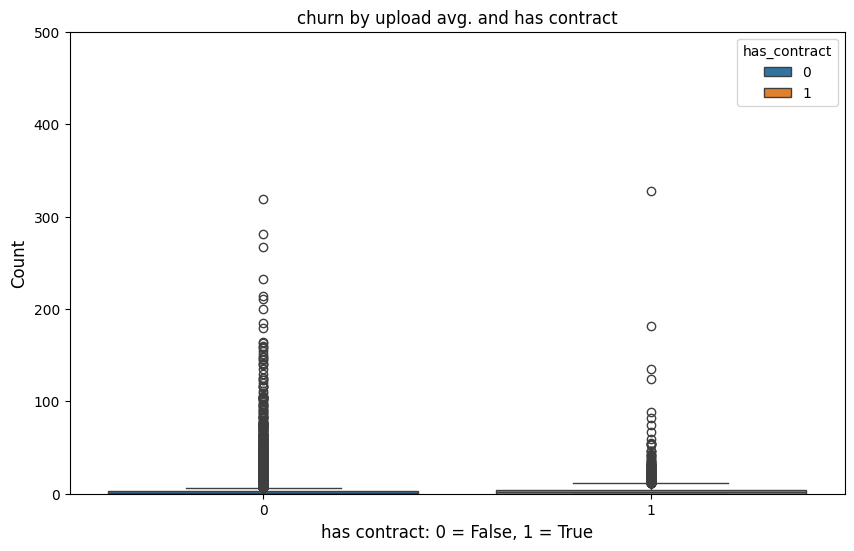

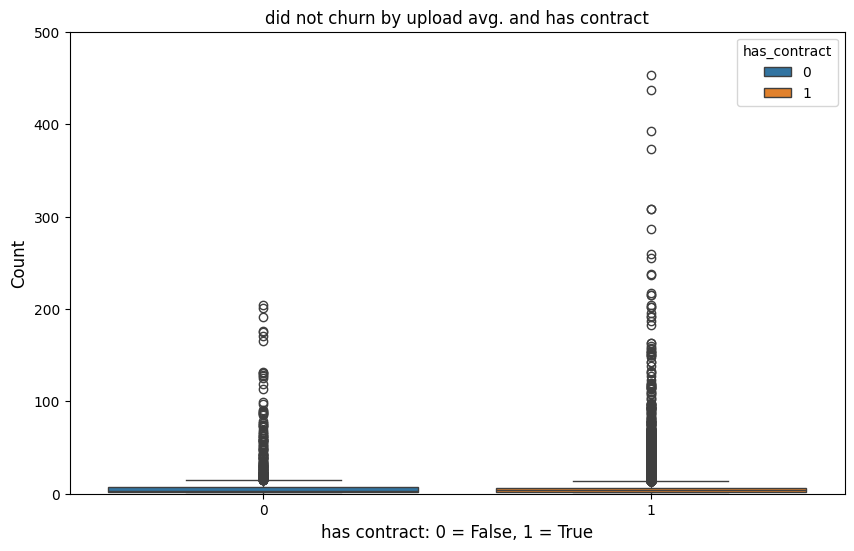

In [35]:
# Create the plot
dataframes = [df_churned, df_not_churned]
dataframe_title = ["churn by upload avg. and has contract","did not churn by upload avg. and has contract"]
for index, dataframe in enumerate(dataframes):
    plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
    ax = sns.boxplot(x="has_contract", y="upload_avg", data=dataframe, hue='has_contract', dodge=False, legend=True)
    plt.title(dataframe_title[index])
    plt.xlabel('has contract: 0 = False, 1 = True', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.ylim(0, 500)
    plt.show()  

#### Further analysis is needed related to upload and churn, but there is a positive relationship between upload average and churn.

### Is TV or Movie subscriptions leading to excess download usage?

In [36]:
df_churned.groupby(['is_tv_subscriber', 'is_movie_package_subscriber'])[['download_avg','upload_avg','churn']].agg(['sum'])

download_avg upload_avg  churn
                                                      sum        sum    sum
is_tv_subscriber is_movie_package_subscriber                               
0                0                               227598.6    25283.0  11964
                 1                                   83.2        5.7      2
1                0                               558798.9    56807.2  19891
                 1                               288393.7    28750.4   8193

In [37]:
df_not_churned.groupby(['is_tv_subscriber', 'is_movie_package_subscriber'])[['download_avg','upload_avg','churn']].agg(['sum'])


download_avg upload_avg churn
                                                      sum        sum   sum
is_tv_subscriber is_movie_package_subscriber                              
0                0                               119781.5    12373.9     0
1                0                               840246.2    75187.9     0
                 1                              1106096.7   102972.8     0

#### Subscription packages use more data
While it may seem obvious, confirming data expectations is important.

## Is customers doing download over limit leading to churn?

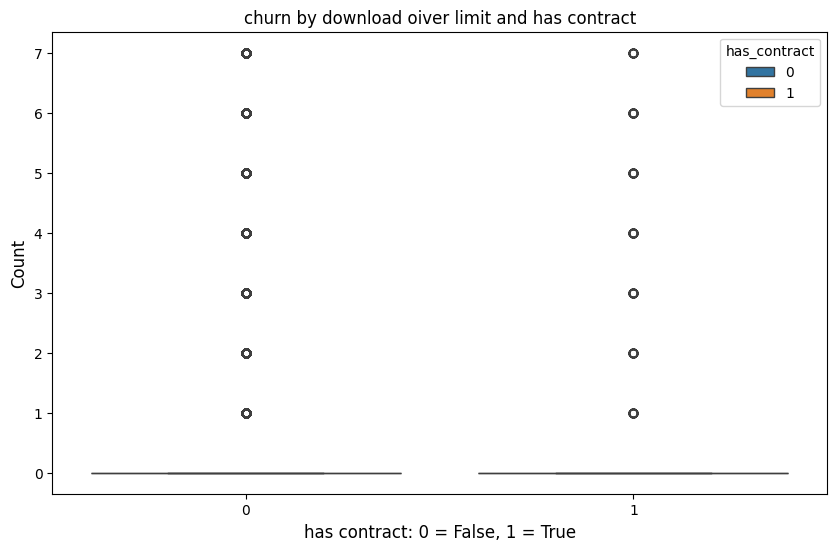

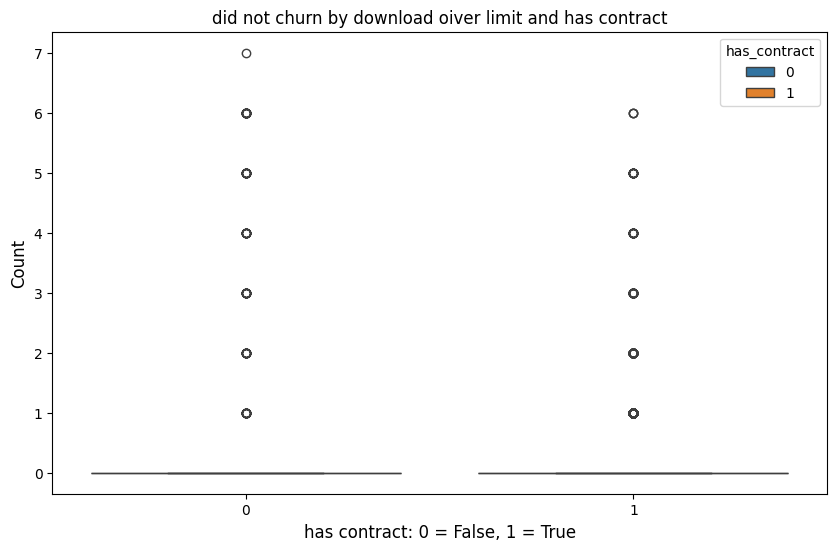

In [38]:
# Create the plot
dataframes = [df_churned, df_not_churned]
dataframe_title = ["churn by download oiver limit and has contract","did not churn by download oiver limit and has contract"]
for index, dataframe in enumerate(dataframes):
    plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
    ax = sns.boxplot(x="has_contract", y="download_over_limit", data=dataframe, hue='has_contract', dodge=False, legend=True)
    plt.title(dataframe_title[index])
    plt.xlabel('has contract: 0 = False, 1 = True', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    # plt.ylim(0, 500)
    plt.show()  

#### It appears to be a positive relationship between downloads over limit and churn. 
#### Specifically, there is a high rate or churn of customers under contract.
#### Hypothesis. If customers are charged extra for tv and moview, then again charged more for exceeding downlimits, it may make financial sense to pay early termination fees instead of continuing to pay higher rates for the service levels desired.

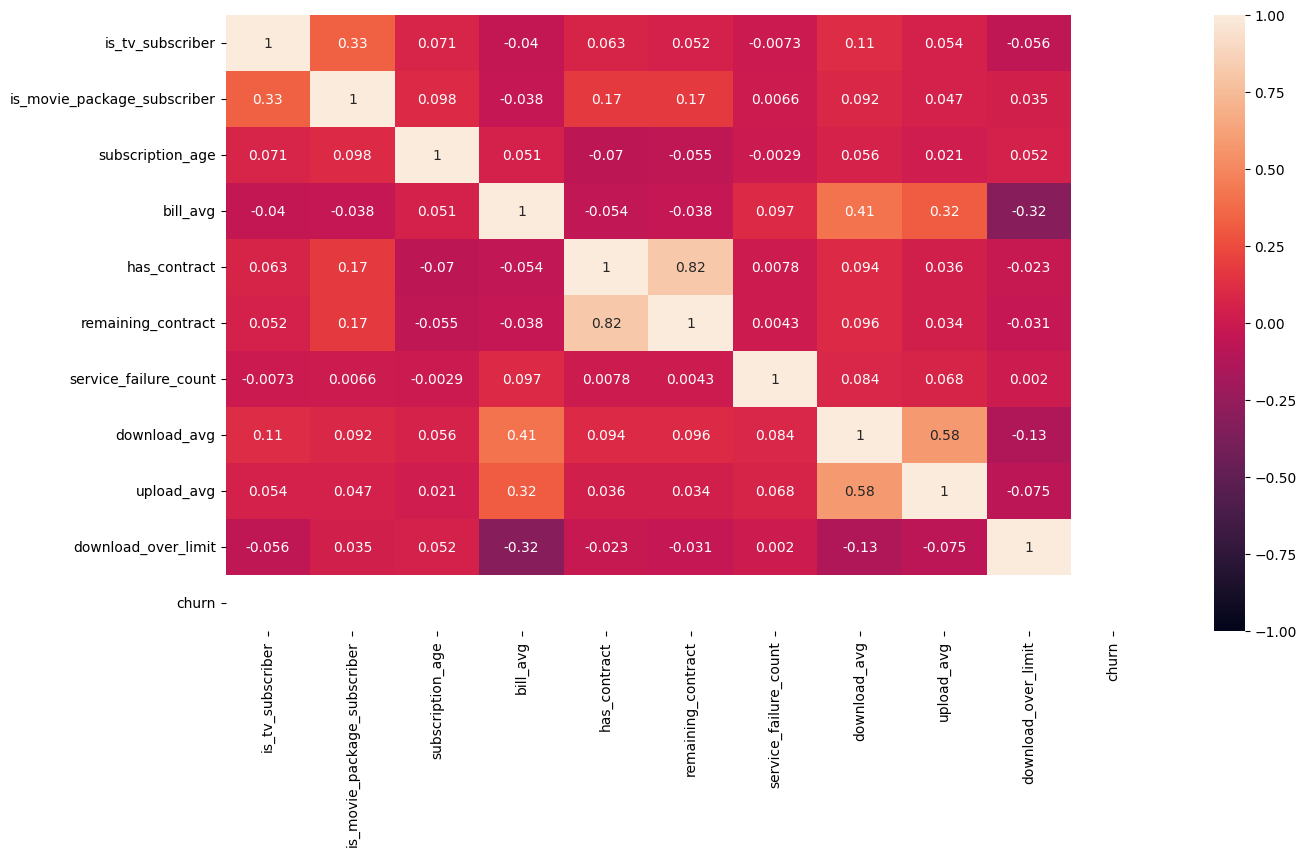

In [39]:
df_copy = df_churned.copy()
df_copy = df_copy.drop('id', axis=1) 
correlation = df_copy.corr()

plt.figure(figsize=(15,8))
sns.heatmap(correlation,vmin=-1,vmax=1,annot=True)
plt.show()

In [40]:
df_copy.columns

Index(['is_tv_subscriber', 'is_movie_package_subscriber', 'subscription_age',
       'bill_avg', 'has_contract', 'remaining_contract',
       'service_failure_count', 'download_avg', 'upload_avg',
       'download_over_limit', 'churn'],
      dtype='object')

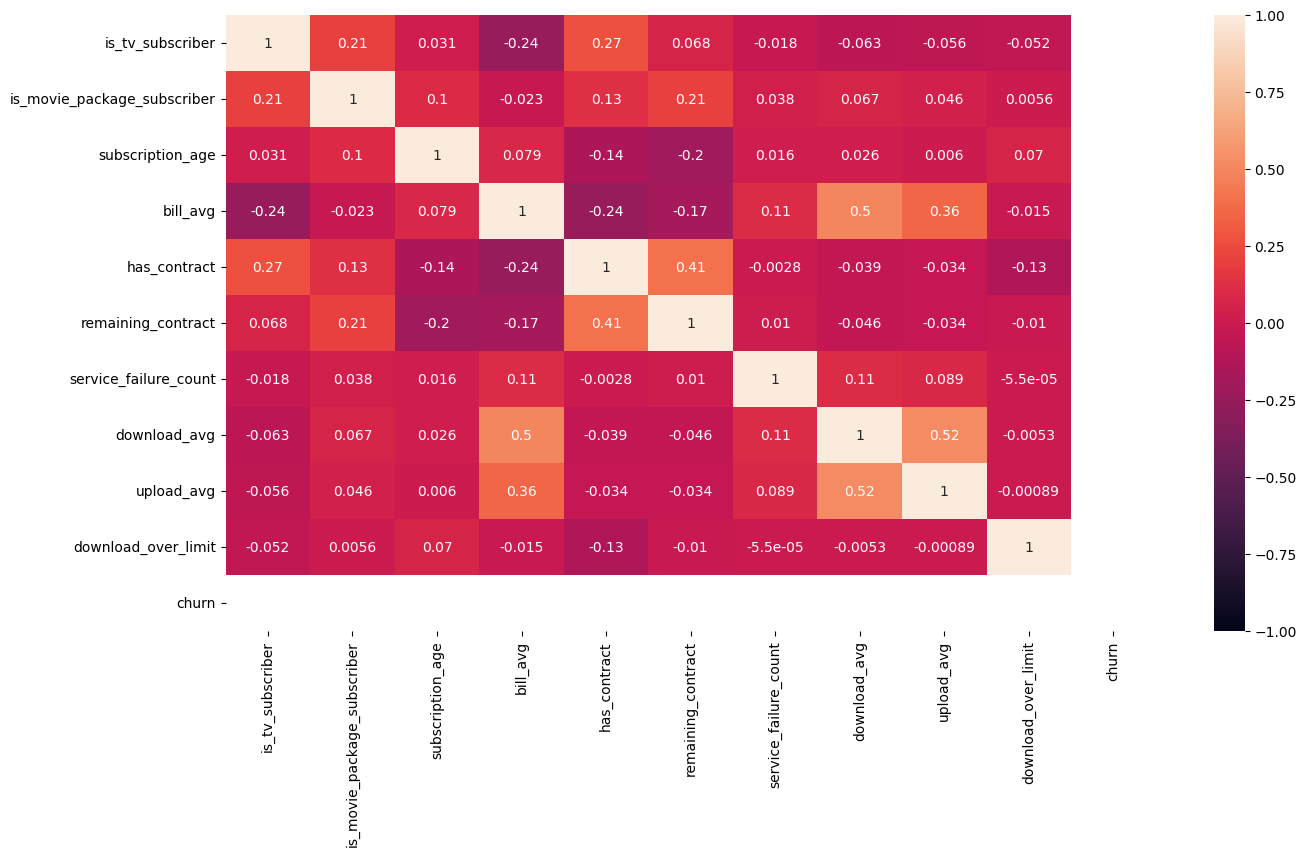

In [41]:
df_copy = df_not_churned.copy()
df_copy = df_copy.drop('id', axis=1) 
correlation = df_copy.corr()

plt.figure(figsize=(15,8))
sns.heatmap(correlation,vmin=-1,vmax=1,annot=True)
plt.show()

#### Comparing the heat maps of churn vs. not_churned, there is a strong correlation between bill_age and download_over_limit in the churn heatmap that does not exist on the not_churned heatmap.

## Logistic Regression Modeling (Without Scaling - using 10 features)

In [42]:
from sklearn.model_selection import train_test_split

# x_vars = df[['is_tv_subscriber','subscription_age','service_failure_count',
#              'download_avg','has_contract','bill_avg','remaining_contract']]
x_vars = df[['is_tv_subscriber', 'is_movie_package_subscriber', 'subscription_age', 
             'bill_avg', 'has_contract', 'remaining_contract', 'service_failure_count', 
             'download_avg', 'upload_avg', 'download_over_limit']]
y_var  = df['churn']

xTrain, xValid, yTrain, yValid = train_test_split(x_vars, y_var, train_size=0.6, random_state=2)

In [43]:
from sklearn.linear_model import LogisticRegression
LogitModel = LogisticRegression(max_iter=1000)  # Increase from default 100

In [44]:
LogitModel.fit(xTrain,yTrain)

from sklearn.metrics import accuracy_score
predictions = LogitModel.predict(xTrain)
accuracy_score(yTrain, predictions)

0.9239922516373028

#### Using the training set, the churn accuracy can be predicted with a 92.23% accuracy

In [45]:
predictions2 = LogitModel.predict(xValid)
accuracy_score(yValid, predictions2)

0.9206157039086821

#### Using the validation set, the churn accuracy can be predicted with a 91.91% accuracy

In [46]:
from pprint import pprint as pp
from sklearn.metrics import classification_report
results = classification_report(yValid, predictions2)
pp(results)

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.89      0.94      0.91     12844\n'
 '           1       0.95      0.91      0.93     16066\n'
 '\n'
 '    accuracy                           0.92     28910\n'
 '   macro avg       0.92      0.92      0.92     28910\n'
 'weighted avg       0.92      0.92      0.92     28910\n')


#### create a confusion matrix
NOTE: a confusion matris displays 
##### Structure of a Confusion Matrix

###### confusion matrix is typically a square matrix where:

* Rows: Represent the true (actual) classes or labels.
* Columns: Represent the predicted classes or labels.

###### Each cell within the matrix holds a count of instances:

* Diagonal Elements: Indicate the number of correct predictions for each class (True Positives and True Negatives).
* Off-Diagonal Elements: Indicate the number of misclassifications (False Positives and False Negatives).

##### Interpreting a Confusion Matrix

* True Positives (TP): The number of positive cases correctly predicted as positive.
* True Negatives (TN): The number of negative cases correctly predicted as negative.
* False Positives (FP): The number of negative cases incorrectly predicted as positive (Type I error).
* False Negatives (FN): The number of positive cases incorrectly predicted as negative (Type II error).

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yValid, predictions2)

array([[12045,   799],
       [ 1496, 14570]])

<Axes: xlabel='Predicted', ylabel='Actual'>

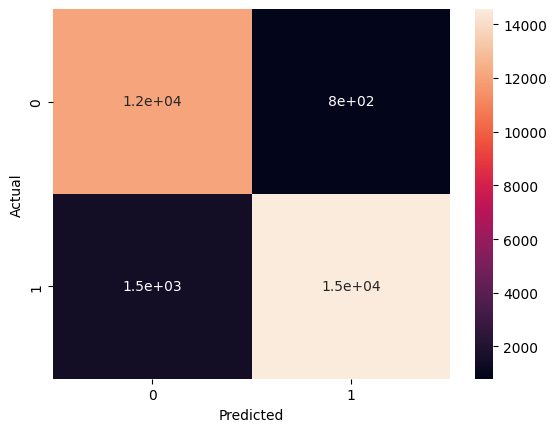

In [48]:
confusion_matrix(yValid, predictions2)
confusion_matrix = pd.crosstab(yValid, predictions2, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

###### Columns are predictions & rows are actual observations. Darker boxes are the ones showing wrong prediction for churn. Lighter boxes shows how many values were corrrectly predicted. 
###### The values in the darker boxes are column are low compared to the lighter boxes thus showing good accuracy.

In [49]:
df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,has_contract,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,1,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,0,0.00,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,0,0.00,1,0.0,0.0,0,1
4,34,0,0,6.39,0,0,0.00,0,0.0,0.0,0,1


In [50]:
# Predicting the probability of churn
LogitModel.predict_proba(np.array([[1, 0, 11.95, 25, 1, 0.14, 0, 8.4, 2.3, 0]]))	

/Users/lavaredwards/Documents/GitHub/churn/churn-env/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.98581026, 0.01418974]])

###### The predicted probability of customer churning is 23%.

In [51]:
import statsmodels.api as sm
# x_inc = df[['is_tv_subscriber','subscription_age','service_failure_count',
#             'download_avg','download_over_limit','remaining_contract','has_contract','bill_avg']]
x_inc = df[['is_tv_subscriber', 'is_movie_package_subscriber', 'subscription_age', 
            'bill_avg', 'has_contract', 'remaining_contract', 'service_failure_count', 
            'download_avg', 'upload_avg', 'download_over_limit']]
x_inc = sm.add_constant(x_inc)
y_var = df['churn']

In [52]:
xTrain1, xValid1, yTrain, yValid = train_test_split(x_inc, y_var, train_size=0.6, random_state=2)

In [53]:
Logit_Inc = sm.Logit(yTrain, xTrain1)
results_Inc = Logit_Inc.fit()
print(results_Inc.summary())

Optimization terminated successfully.
         Current function value: 0.241902
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                43364
Model:                          Logit   Df Residuals:                    43353
Method:                           MLE   Df Model:                           10
Date:                Thu, 25 Jul 2024   Pseudo R-squ.:                  0.6481
Time:                        21:43:18   Log-Likelihood:                -10490.
converged:                       True   LL-Null:                       -29813.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           5.3250      0.084     63.471      0.000   

#### I am not a fan of "removing" variables (features) that are statistical insignificant.
Most machine learning algorithums can easily process and take into account hundreds or thousands of data points.

## Principal Component Analysis

In [54]:
# Separate the Target column in y array and rest of the values of the independent feature in X array.

x = df.iloc[:,0:11].values 
y = df.iloc[:,11].values

In [55]:
x

array([[1.500000e+01, 1.000000e+00, 0.000000e+00, ..., 8.400000e+00,
        2.300000e+00, 0.000000e+00],
       [1.800000e+01, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [2.300000e+01, 1.000000e+00, 0.000000e+00, ..., 1.370000e+01,
        9.000000e-01, 0.000000e+00],
       ...,
       [1.689679e+06, 1.000000e+00, 0.000000e+00, ..., 1.500000e+00,
        2.000000e-01, 0.000000e+00],
       [1.689733e+06, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.689744e+06, 1.000000e+00, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]])

In [56]:
y

array([0, 1, 1, ..., 1, 1, 1])

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
# Standarization
scaler = StandardScaler()
scaler.fit(x)
x_std = scaler.transform(x)

In [59]:
x_std

array([[-1.73033193,  0.47603011, -0.7091697 , ..., -0.55371302,
        -0.19086036, -0.20821312],
       [-1.73032579, -2.10070746, -0.7091697 , ..., -0.68637825,
        -0.42561131, -0.20821312],
       [-1.73031557,  0.47603011, -0.7091697 , ..., -0.47000757,
        -0.33375224, -0.20821312],
       ...,
       [ 1.72431579,  0.47603011, -0.7091697 , ..., -0.66268803,
        -0.40519819, -0.20821312],
       [ 1.72442619, -2.10070746, -0.7091697 , ..., -0.68637825,
        -0.42561131, -0.20821312],
       [ 1.72444868,  0.47603011,  1.41009972, ..., -0.68637825,
        -0.42561131, -0.20821312]])

In [60]:
# Covariance Matrix
print('Covariance matrix \n') 
cov_mat= np.cov(x_std, rowvar=False) 
cov_mat

Covariance matrix 



array([[ 1.00001384,  0.28205551,  0.13219914, -0.60224949,  0.01871811,
         0.47999227,  0.45330794, -0.02658907,  0.23514476,  0.14227346,
        -0.22893483],
       [ 0.28205551,  1.00001384,  0.33743968,  0.0872775 , -0.07624646,
         0.32811551,  0.25536957, -0.01604153,  0.13109077,  0.06555506,
        -0.10354762],
       [ 0.13219914,  0.33743968,  1.00001384,  0.13198832, -0.02253479,
         0.33464892,  0.34402972,  0.01334513,  0.15908118,  0.09241425,
        -0.02635282],
       [-0.60224949,  0.0872775 ,  0.13198832,  1.00001384,  0.06733025,
         0.0476331 , -0.02633479,  0.00344951,  0.07061997,  0.03119907,
         0.02369396],
       [ 0.01871811, -0.07624646, -0.02253479,  0.06733025,  1.00001384,
        -0.05108764, -0.06914247,  0.101271  ,  0.4329918 ,  0.33491604,
        -0.23274095],
       [ 0.47999227,  0.32811551,  0.33464892,  0.0476331 , -0.05108764,
         1.00001384,  0.78858586, -0.01580857,  0.25772391,  0.13451077,
        -0.150

In [61]:
# Eigen vectors, Eigen values
cov_mat = np.cov(x_std.T) 
eig_vals, eig_vecs = np.linalg.eig(cov_mat) 
print(f'Eigenvectors \n{eig_vecs}') 
print(f'\nEigenvalues \n{eig_vals}')

Eigenvectors 
[[ 0.41332347  0.17795787  0.47220036  0.58994033  0.44757908 -0.04034369
   0.1219121   0.02126308 -0.05511915  0.07745296  0.01362101]
 [ 0.30027838  0.14171032 -0.23890427 -0.09593457 -0.17312914  0.08655561
   0.69018048 -0.09252004  0.12735268  0.25164816  0.47069338]
 [ 0.29358858  0.08357114 -0.3801704  -0.00854289  0.0611695  -0.08578775
   0.34521003 -0.02859311 -0.02682359 -0.19325488 -0.77010607]
 [-0.07640491 -0.20213499 -0.70532276  0.4844191   0.314133    0.18807019
  -0.19495378 -0.06031378 -0.04592561  0.01948727  0.20731159]
 [ 0.09665427 -0.56369673  0.11856225 -0.02542635  0.01763078  0.19103672
  -0.02672565 -0.09614326  0.3696756   0.62889022 -0.28155607]
 [ 0.48323575  0.18233749 -0.14411352 -0.56475991  0.46875699 -0.00828956
  -0.38433202 -0.00373     0.05174395  0.09058252  0.12289958]
 [ 0.46067891  0.2192317  -0.10978679  0.28328115 -0.64454455 -0.05230021
  -0.44385826 -0.00509294  0.16542305  0.06758906 -0.01639832]
 [ 0.01498598 -0.17276816  

In [62]:
# Eigen vector verification
sq_eig=[] 
for i in eig_vecs: 
    sq_eig.append(i**2) 
    print(sq_eig)
    
a = sum(sq_eig) 
print(f"sum of squares of each values in an eigen vector is \n{a}") 
for ev in eig_vecs: 
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

[array([1.70836289e-01, 3.16690048e-02, 2.22973179e-01, 3.48029592e-01,
       2.00327029e-01, 1.62761324e-03, 1.48625606e-02, 4.52118680e-04,
       3.03812086e-03, 5.99896141e-03, 1.85531869e-04])]
[array([1.70836289e-01, 3.16690048e-02, 2.22973179e-01, 3.48029592e-01,
       2.00327029e-01, 1.62761324e-03, 1.48625606e-02, 4.52118680e-04,
       3.03812086e-03, 5.99896141e-03, 1.85531869e-04]), array([0.09016711, 0.02008182, 0.05707525, 0.00920344, 0.0299737 ,
       0.00749187, 0.4763491 , 0.00855996, 0.0162187 , 0.0633268 ,
       0.22155225])]
[array([1.70836289e-01, 3.16690048e-02, 2.22973179e-01, 3.48029592e-01,
       2.00327029e-01, 1.62761324e-03, 1.48625606e-02, 4.52118680e-04,
       3.03812086e-03, 5.99896141e-03, 1.85531869e-04]), array([0.09016711, 0.02008182, 0.05707525, 0.00920344, 0.0299737 ,
       0.00749187, 0.4763491 , 0.00855996, 0.0162187 , 0.0633268 ,
       0.22155225]), array([8.61942564e-02, 6.98413600e-03, 1.44529530e-01, 7.29809092e-05,
       3.74170820e-

In [63]:
#Make a list of (eigenvalue, eigenvector) tuples 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))] 

print(type(eig_pairs)) 
    
#Sort the (eigenvalue, eigenvector) tuples from high to low eig_pairs.sort() 
eig_pairs.reverse() 
print("\n",eig_pairs) 

#Visually confirm that the list is correctly sorted by decreasing eigenvalues 
print('\n\n\nEigenvalues in descending order:') 
for i in eig_pairs: 
    print(i[0])

<class 'list'>

 [(0.6619766165568999, array([ 0.01362101,  0.47069338, -0.77010607,  0.20731159, -0.28155607,
        0.12289958, -0.01639832,  0.0837219 ,  0.07563203,  0.18662476,
       -0.0039194 ])), (0.5593380120264586, array([ 0.07745296,  0.25164816, -0.19325488,  0.01948727,  0.62889022,
        0.09058252,  0.06758906, -0.04655238,  0.0710222 , -0.56389091,
        0.3993575 ])), (0.4015728288983904, array([-0.05511915,  0.12735268, -0.02682359, -0.04592561,  0.3696756 ,
        0.05174395,  0.16542305, -0.01101749, -0.75786339,  0.47556655,
        0.10281236])), (0.9578871279082365, array([ 0.02126308, -0.09252004, -0.02859311, -0.06031378, -0.09614326,
       -0.00373   , -0.00509294, -0.76587963,  0.21087778,  0.30643651,
        0.50229956])), (0.8581846214204253, array([ 0.1219121 ,  0.69018048,  0.34521003, -0.19495378, -0.02672565,
       -0.38433202, -0.44385826, -0.02622866,  0.01719033,  0.07034693,
        0.01561223])), (1.0108309513596812, array([-0.04034369,  

In [64]:
# Explained Variance
tot = sum(eig_vals) 
print("\n",tot) 
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)] 
print("\n\n1. Variance Explained\n",var_exp) 
cum_var_exp = np.cumsum(var_exp) 
print("\n\n2. Cumulative Variance Explained\n",cum_var_exp) 
print("\n\n3. Percentage of variance the first seven principal components each contain\n ",var_exp[0:7]) 
print("\n\n4. Percentage of variance the first seven principal components together contain\n",sum(var_exp[0:7]))


 11.000152200683548


1. Variance Explained
 [25.861094428532827, 16.513994185450247, 13.650325225182778, 9.1892451387797, 8.707944312340638, 7.801570430699112, 6.017885975393729, 5.084820662678662, 3.650611569478436, 2.012392701660251, 1.5101153698036254]


2. Cumulative Variance Explained
 [ 25.86109443  42.37508861  56.02541384  65.21465898  73.92260329
  81.72417372  87.7420597   92.82688036  96.47749193  98.48988463
 100.        ]


3. Percentage of variance the first seven principal components each contain
  [25.861094428532827, 16.513994185450247, 13.650325225182778, 9.1892451387797, 8.707944312340638, 7.801570430699112, 6.017885975393729]


4. Percentage of variance the first seven principal components together contain
 87.74205969637903


In [65]:
cov_mat = np.cov(x_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_pairs = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
print("Eigen values in descending order:")
for i in eig_pairs:
    print(i[0])

Eigen values in descending order:
2.8447597479011044
1.8165644948115587
1.5015565506584048
0.166114989084314
0.22136626005807522
1.0108309513596812
0.8581846214204253
0.9578871279082365
0.4015728288983904
0.5593380120264586
0.6619766165568999


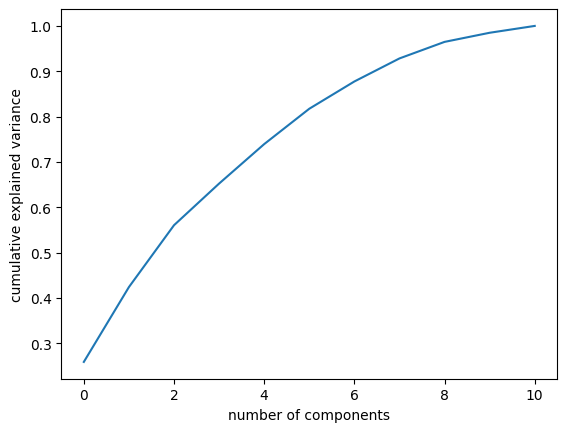

In [66]:
# Scree Plot
from sklearn.decomposition import PCA
pca = PCA().fit(x_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")
plt.show()

In [67]:
pca = PCA(n_components=7)
x_pca = pca.fit_transform(x_std)
print(pca.explained_variance_ratio_)

[0.25861094 0.16513994 0.13650325 0.09189245 0.08707944 0.0780157
 0.06017886]


In [68]:
0.258+0.165+0.136+0.091+0.087+0.078+0.060

0.875

#### ~ 87.5% of  the variance is explained when we use 10 components. 

In [69]:
principalComponents = pca.fit_transform(x_std) 
principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'
                          , 'principal component 3', 'principal component 4', 'principal component 5'
                           , 'principal component 6','principal component 7'])
principalDf.head(5) # prints the top 5 rows

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7
0,-1.022901,1.041419,3.968211,-1.604777,0.409997,-1.230717,-1.618626
1,-3.001408,0.205012,1.982642,-0.761367,-0.029455,-1.757596,-0.261895
2,-2.045756,0.737886,2.688747,-1.238315,0.272021,-0.067460,-1.237665
3,-2.778772,1.178231,1.322391,-0.192699,1.021181,-1.702850,0.220523
4,-2.932686,0.023231,1.348348,-0.592239,-0.083694,-1.582275,-0.075466


In [70]:
finalDf = pd.concat([principalDf,pd.DataFrame(y,columns = ['churn'])], axis = 1) 
finalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,churn
0,-1.022901,1.041419,3.968211,-1.604777,0.409997,-1.230717,-1.618626,0
1,-3.001408,0.205012,1.982642,-0.761367,-0.029455,-1.757596,-0.261895,1
2,-2.045756,0.737886,2.688747,-1.238315,0.272021,-0.067460,-1.237665,1
3,-2.778772,1.178231,1.322391,-0.192699,1.021181,-1.702850,0.220523,1
4,-2.932686,0.023231,1.348348,-0.592239,-0.083694,-1.582275,-0.075466,1


In [71]:
x_pca.shape

(72274, 7)

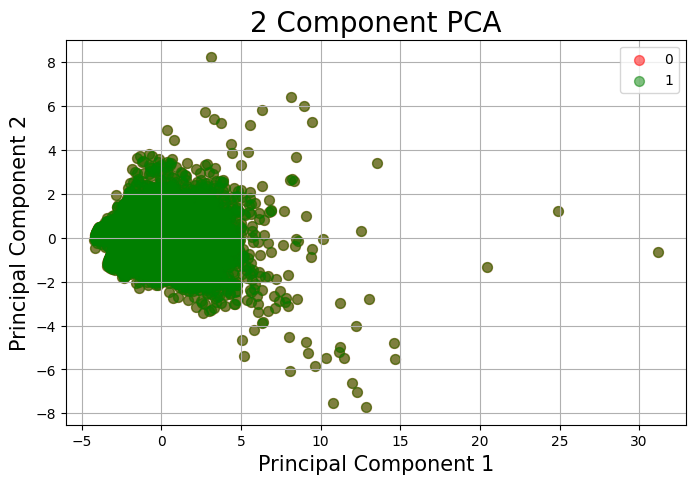

In [72]:
fig = plt.figure(figsize = (8,5)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15) 
ax.set_ylabel('Principal Component 2', fontsize = 15) 
ax.set_title('2 Component PCA', fontsize = 20) 
targets = [0,1] 
colors = ['r', 'g'] 
for target, color in zip(targets,colors): 
    indicesToKeep = finalDf['churn'] == target  
    ax.scatter(x_pca[:,0],x_pca[:,6], alpha = 0.5
               , c = color , s = 50) 
ax.legend(targets) 
ax.grid()

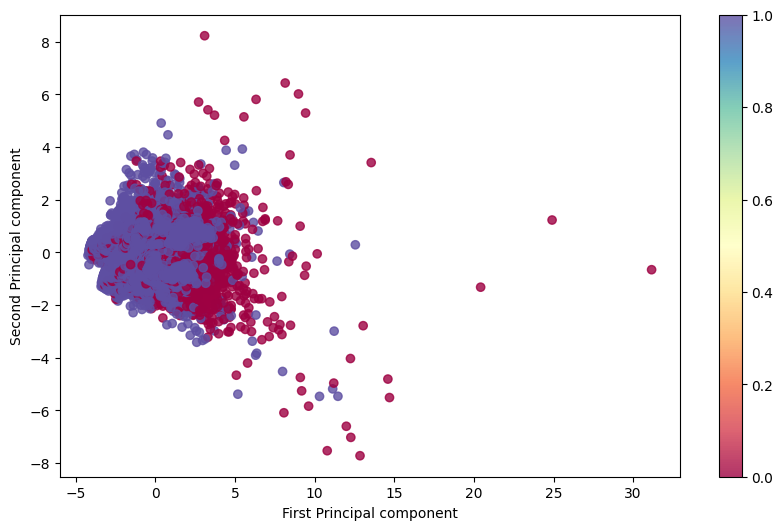

In [73]:
import matplotlib.colors as mcolors

plt.figure(figsize=(10,6))

plt.scatter(x_pca[:, 0], x_pca[:, 6], c=df['churn'], alpha=0.8, cmap=plt.colormaps['Spectral'])  

plt.xlabel('First Principal component')
plt.ylabel('Second Principal component')
plt.colorbar()

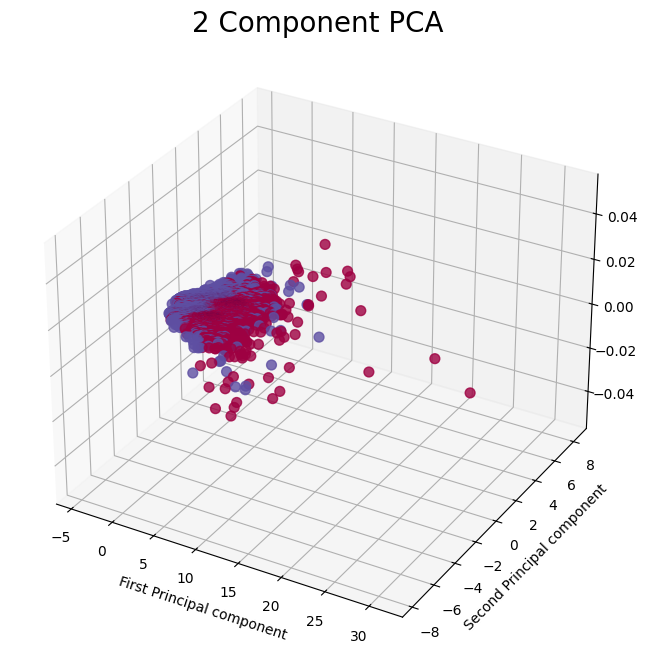

In [74]:
fig = plt.figure(figsize = (10,8)) 
ax = fig.add_subplot(1,1,1,projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 10) 
ax.set_ylabel('Principal Component 2', fontsize = 10) 
ax.set_title('2 Component PCA', fontsize = 20) 
targets = [0,1] 
colors = ['r', 'g', 'b'] 
ax.scatter(x_pca[:,0],x_pca[:,6],c = df['churn'], alpha=0.8, 
            cmap=plt.colormaps['Spectral'], s=50)
plt.xlabel('First Principal component')
plt.ylabel('Second Principal component')
plt.show()

## Recommendations for Churn Mitigation:

1. <b>Proactive Contract Management</b>: As contract expiration is a strong predictor of churn, implement proactive strategies before contracts end. Offer renewal incentives tailored to each customer's initial sign-up reasons (e.g., promotional discounts, service upgrades) to encourage continued subscription.

2. <b>Targeted Pricing Adjustments</b>: Recognizing the impact of service cost on churn, consider offering reduced rates or flexible pricing options to customers approaching contract expiration or demonstrating churn-like behavior. Conduct a cost-benefit analysis to ensure any discounts offered result in greater profitability compared to acquiring new customers.

3. <b>Data Usage Policy Review</b>: Investigate the relationship between data overage charges and churn, particularly for customers with TV subscriptions. Evaluate the feasibility of adjusting data limits or offering separate data plans for customers with TV services to alleviate potential financial burdens.

4. <b>Bundled Service Optimization</b>: Analyze the churn rates for customers with combined TV and movie subscriptions. Assess the profitability of these bundles and consider offering alternative options (e.g., standalone TV subscriptions) or targeted promotions to mitigate churn within this segment.

5. <b>Service Reliability Improvement</b>:  Prioritize addressing service failures, as they contribute to customer dissatisfaction and churn. Implement proactive measures to reduce disruptions and offer compensation or incentives (e.g., service credits, free upgrades) to affected customers to mitigate the impact of service outages.

Additional Considerations:

1. <b>Customer Segmentation</b>:  Develop a more nuanced understanding of customer segments based on demographics, usage patterns, and other relevant factors. This will enable the implementation of highly targeted retention strategies.

2. <b>Customer Feedback</b>:  Gather feedback from both current and churned customers to understand their pain points, preferences, and reasons for leaving. This valuable information can guide the development of targeted improvements.

3. <b>Ongoing Monitoring and Analysis</b>: Continuously monitor churn rates and assess the effectiveness of implemented strategies. Adjust retention efforts based on evolving customer behavior and market trends.

By implementing these recommendations and continuously refining your approach, you can significantly reduce churn, enhance customer satisfaction, and drive sustainable growth in the telecommunications market.